In [2]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from pylab import rcParams
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import time
import tensorflow as tf
from fpp_torch import *

In [3]:
xsample = np.load('data/circle_in_5D_cube.npy')
sample = xsample[:,:-1]
f = xsample[:,-1]
print("sample:", sample.shape)

### setup fpp input ####
model = fpp(printOutput=True)
model.setup(sample, f, degree=3)

### training ####
start = time.time()
model.train(50, 50) ### circle
end = time.time()
print("timing:", end-start)

sample: (3000, 5)
total step size: 3000
step 0 reconstruction error: 1.27
step 500 reconstruction error: 0.14
step 1000 reconstruction error: 0.14
step 1500 reconstruction error: 0.14
step 2000 reconstruction error: 0.14
step 2500 reconstruction error: 0.10
step 2999 reconstruction error: 0.06
timing: 5.55392599105835


embedding: (3000, 2)


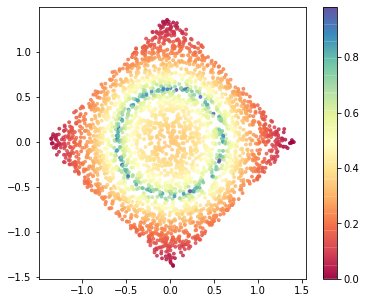

In [4]:
from pylab import rcParams
rcParams['figure.figsize'] = 6, 5
proj_mat, loss, _ = model.eval()
embedding = np.matmul(sample, proj_mat)
print("embedding:", embedding.shape)
plt.scatter(embedding[:,0], embedding[:,1], c=f, cmap="Spectral", alpha=0.8, s=8)
plt.colorbar()
plt.show()

In [5]:
mnist = tf.keras.datasets.mnist
(X_train, y_train),(X_test, y_test) = mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0
X_train = X_train.reshape( (X_train.shape[0], X_train.shape[1]*X_train.shape[2]))
X_test = X_test.reshape( (X_test.shape[0], X_test.shape[1]*X_test.shape[2]))
sample = X_train
f = (y_train)
print (np.min(f), np.max(f), f.shape, sample.shape)


0 9 (60000,) (60000, 784)


In [6]:
model = fpp(printOutput = True)
# model.setupMultiClass(sample, f, nonlinear=False)
model.setupMultiClass(sample, f, nonlinear=True)

model.reset()
start = time.time()
model.train(20, 50) ### MNIST

proj_mat, loss, _ = model.eval()
print("Global loss:", loss)
end = time.time()
print("computation time: ", end - start, "(s)")

n_class: 10
total step size: 12000
step 0 reconstruction error: 2.30
step 500 reconstruction error: 2.27
step 1000 reconstruction error: 2.25
step 1500 reconstruction error: 2.27
step 2000 reconstruction error: 2.28
step 2500 reconstruction error: 2.30
step 3000 reconstruction error: 2.30
step 3500 reconstruction error: 2.29
step 4000 reconstruction error: 2.29
step 4500 reconstruction error: 2.32
step 5000 reconstruction error: 2.18
step 5500 reconstruction error: 2.17
step 6000 reconstruction error: 2.20
step 6500 reconstruction error: 2.26
step 7000 reconstruction error: 2.15
step 7500 reconstruction error: 2.20
step 8000 reconstruction error: 2.32
step 8500 reconstruction error: 2.28
step 9000 reconstruction error: 2.33
step 9500 reconstruction error: 2.29
step 10000 reconstruction error: 2.32
step 10500 reconstruction error: 2.35
step 11000 reconstruction error: 2.34
step 11500 reconstruction error: 2.33
step 11999 reconstruction error: 2.29
Global loss: 2.2940642833709717
computa

In [7]:
embedding = np.matmul(X_train, proj_mat)

print(embedding.shape, y_train.shape)


(60000, 2) (60000,)


In [ ]:
plt.scatter(embedding[:,0], embedding[:,1], c=y_train, cmap="tab10", alpha=1.0, s=5)